<div class="alert alert-success">
  <b> ✔️Комментарий ревьюера ✔️</b>

Привет, Эдгар! Меня зовут Михаил Майоров, я буду проверять твой проект. Предлагаю общаться на 'ты' :)
Однако, если это неудобно - сообщи, и мы перейдем на 'Вы'. Моя главная цель —  поделиться с тобой своим опытом и помочь тебе стать аналитиком данных, а не только указать на совершенные тобой ошибки.

Видно, что к проету приложен большой труд. Все ключевые этапы в работе выполнены, статистическое исследование проведено качественно. Так что в целом справиться с задачей тебе удалось.

Есть несколько аспектов, которые **требуют** твоего **внимания**. Комментарии по ним помечены красным цветом и символами ❌. После их доработки проект будет принят, осталось совсем немного :) 
    

Давай работать над проектом в диалоге: если **ты что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Мне будет легче отследить изменения, если ты будешь использовать синюю форму, которую я прикреплю ниже. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 



Жду проект на повторное ревью. Успехов в изучении!



</div>
<div class="alert alert-block alert-danger"> <b>❌ Комментарий ревьюера ❌</b> 
    Так я выделяю моменты, которые требуют особого внимания. Нужно будет учесть их и внести корректировки в свою работу. </div>
<div class="alert alert-block alert-warning"> <b>⚠️ Комментарий ревьюера ⚠️</b> 
    Желтым я отмечу рекомендации, которые, могут быть полезными при твоей работе. Они носят рекомендационный характер, но будет классно, если ты будешь учитывать их при работе.</div>
<div class="alert alert-block alert-success"> <b>✔️ Комментарий ревьюера ✔️</b>
    Так я выделяю удачные и элегантные решения, на которые можно опираться в будущих проектах.</div>
<div class="alert alert-block alert-info">
    
А в таком блоке ты можешь оставить комментарии для меня 
    
</div>

В нашем распоряжении данные стартапа, который продает продукты питания.  Наша задача - изучить и проверить данные, воронку событий, результаты эксперимента. В конечном итоге мы должны получить результат, который поможет разобраться с поведением пользователей нашего мобильного приложения.

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Рекомендую написать небольшой план работы - навык составления ТЗ пригодится в будущем

</div>




### Откроем файл с данными и изучим общую информацию

In [131]:
import pandas as pd #импортируем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from datetime import datetime, timedelta
from IPython.display import display_html
from plotly import graph_objects as go
import math as mth
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)
import warnings
warnings.simplefilter('ignore')

In [132]:
logs = pd.read_csv('/datasets/logs_exp.csv', sep='\t') #чтение файла с данными и сохранение в logs

In [133]:
pd.set_option('display.max_colwidth', 500) #посмотрим на записи в логе
logs

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [134]:
logs.info() #изучим записи в логе

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [135]:
logs.isna().sum() #изучим пропуски в логе

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

In [136]:
logs.duplicated().sum() #изучим дубликаты в логе

413

### Подготовим данные

In [137]:
logs.columns = ['event', 'user_id', 'event_time', 'group'] #переименуем столбцы в логе

In [138]:
logs[logs.duplicated()==True].sort_values(by=['event', 'user_id', 'event_time', 'group']).head(30) #рассмотрим наши дубликаты в логе

,event,user_id,event_time,group
104108,CartScreenAppear,34565258828294726,1564857221,248
17037,CartScreenAppear,197027893265565660,1564659614,246
23421,CartScreenAppear,197027893265565660,1564668928,246
34223,CartScreenAppear,197027893265565660,1564684544,246
112562,CartScreenAppear,197027893265565660,1564902904,246
144045,CartScreenAppear,197027893265565660,1564983860,246
235186,CartScreenAppear,299409047914517767,1565193055,248
42988,CartScreenAppear,438481114985016111,1564722577,247
136430,CartScreenAppear,789235048114585398,1564942828,246
238473,CartScreenAppear,789235048114585398,1565197952,246


In [139]:
logs = logs.drop_duplicates().reset_index(drop=True) #Удалим дубликаты в логе

In [140]:
logs['event_time'] = pd.to_datetime(logs['event_time'], unit='s')  #заменим тип дат в логе
logs['date'] = logs['event_time'].dt.date
logs['date'] = logs['date'].astype('datetime64')
logs.head()

,event,user_id,event_time,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


In [141]:
def sort_group(group): #переименуем наши группы
    if group == 246:
        return 'A'
    elif group == 247:
        return 'A1'
    elif group == 248:
        return 'B'
    else:
        return 'Ошибка'

logs['group'] = logs['group'].apply(sort_group) 

In [142]:
logs.info() #Посмотрим еще раз на записи в логе

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   event_time  243713 non-null  datetime64[ns]
 3   group       243713 non-null  object        
 4   date        243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 9.3+ MB


Наши данные изучены и прошли предобработку. Пропуски отсутствуют. Дубликаты удалены, скорее всего техническая ошибка, так как маловероятно что один пользователь в группе совершал идентичные события в одно и тоже время. Типы данных заменены на соответствующие в них значениям, столбцы приведены к единному стилю. Также добалены столбцы с датой и временем, и отдельный столбец дат. Таким образом, данные подготовлены к дальнейшему анализу.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Очень хорошо, что не забываешь проверять данные на наличие пропусков и дубликатов.  Молодец, что приводишь даты к нужному формату - предобработка проведена отлично.

</div>

### Изучим и проверим данные

In [143]:
event = logs['event'].count() #изучим сколько событий в логе
event

243713

Всего в нашем логе 243713 событий.

In [144]:
user = logs['user_id'].nunique() #изучим сколько пользователей в логе
user

7551

Всего в нашем логе 7551 уникальных пользователей.

In [145]:
(event / user).round() #изучим сколько в среднем событий приходится на пользователя

32.0

Всего в среднем 32 события на одного пользователя.

In [146]:
display(f"Период данных которым мы располагаем: с {logs['event_time'].min()} по {logs['event_time'].max()}") #посмотрим период, которым мы распологаем
display(f"период: {logs['event_time'].max() - logs['event_time'].min()}") 

'Период данных которым мы располагаем: с 2019-07-25 04:43:36 по 2019-08-07 21:15:17'

'период: 13 days 16:31:41'

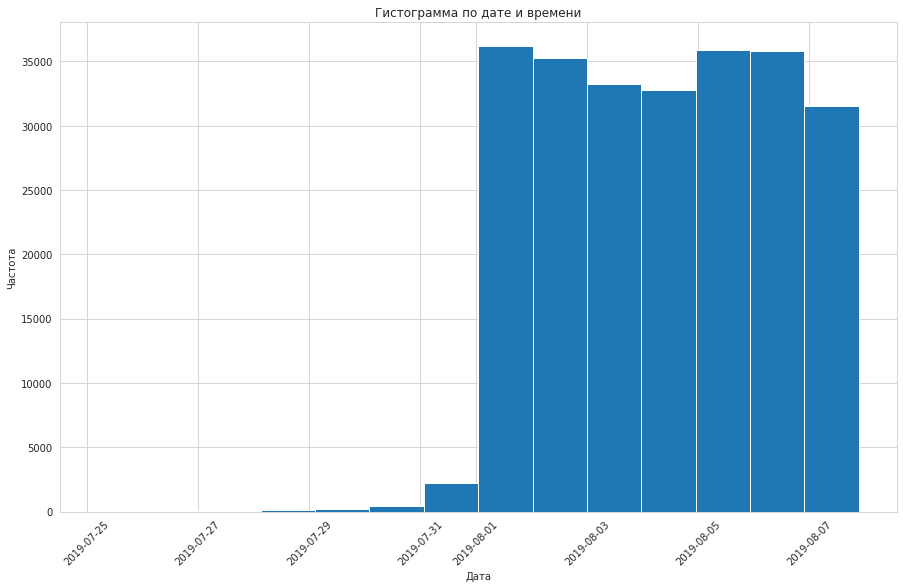

In [147]:
#Построим график
plt.figure(figsize=(15,9))
ax = logs['event_time'].hist(bins=logs['date'].nunique())
plt.title('Гистограмма по дате и времени')
plt.ylabel("Частота")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.show()

In [148]:
logs_new = logs.loc[logs['date'] > '2019-07-31'].reset_index(drop=True) #отбросим старые данные
logs_new.sort_values(by='event_time')

,event,user_id,event_time,group,date
0,Tutorial,3737462046622621720,2019-08-01 00:07:28,A,2019-08-01
1,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,A,2019-08-01
2,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,A,2019-08-01
3,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,A,2019-08-01
4,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,A1,2019-08-01
...,...,...,...,...,...
240882,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,A1,2019-08-07
240883,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,A,2019-08-07
240884,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,A,2019-08-07
240885,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,A,2019-08-07


Посмотрим какими данными в определенный период мы распологаем и построим гистограмму, чтобы с уверенностью утверждать, что у нас одинаково полные данные за весь период. Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определим, с какого момента данные полные и отбросим более старые. На графике видно, что в нашем распоряжении данными только второй недели из двух. Получается, что действительный диапазон данных это с 01.08 по 07.08. Поэтому отбросим более старые данные.

In [149]:
event_new = logs_new['event'].count() #посчитаем сколько событий мы потеряли
display(event - event_new)
display(((event - event_new)/event*100).round()) 

2826

1.0

Отбросив старые данные мы потеряли 2826 событий, что составляет 1% от общего количества событий. 

In [150]:
user_new = logs_new['user_id'].nunique() #посчитаем сколько пользователей мы потеряли
display(user - user_new)
display(((user - user_new)/user*100))

17

0.22513574361011784

Отбросив старые данные мы потеряли 17 пользователей, что составляет 0.2% от общего количества пользователей. 

In [151]:
display(logs_new['group'].value_counts(), logs_new.groupby('group')['user_id'].nunique()) #проверим данные и пользователей по всем экспериментальным группам

B     84563
A     79302
A1    77022
Name: group, dtype: int64

group
A     2484
A1    2513
B     2537
Name: user_id, dtype: int64

Данные по всем пользователям из трех экспериментальных групп на месте.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошо, отбросив данные, мы потеряли незначительную долю от общего числа, при этом сохранили пользователей из каждой группы - приступим к изучению воронки

</div>


### Изучим воронку событий

In [152]:
logs_new['event'].value_counts() #посмотрим какие события есть в логах по их частоте

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

Посмотрим какие события есть в логах и как часто они встречаются. Самое популярное событие - "Появление главного экрана". Далее идет "появление экрана предложений". Следующее "появление экрана корзины". Предпоследним и последним событием идут: "экран успешного платежа", "руководство".  

In [153]:
funnel = logs_new.groupby('event')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index()\
        .rename(columns={'user_id': 'total_users'}) #посчитаем сколько пользователей совершали каждое из этих событий

funnel['percent_1event'] = (funnel['total_users'] / logs_new['user_id'].nunique() * 100).round()
funnel

,event,total_users,percent_1event
0,MainScreenAppear,7419,98.00
1,OffersScreenAppear,4593,61.00
2,CartScreenAppear,3734,50.00
3,PaymentScreenSuccessful,3539,47.00
4,Tutorial,840,11.00


Посчитаем сколько пользователей совершали каждое из данных событий. Таким образом, самое популярное событие - "Появление главного экрана". Дальше события идут также по списку, что и появление в логе по их частоте. 

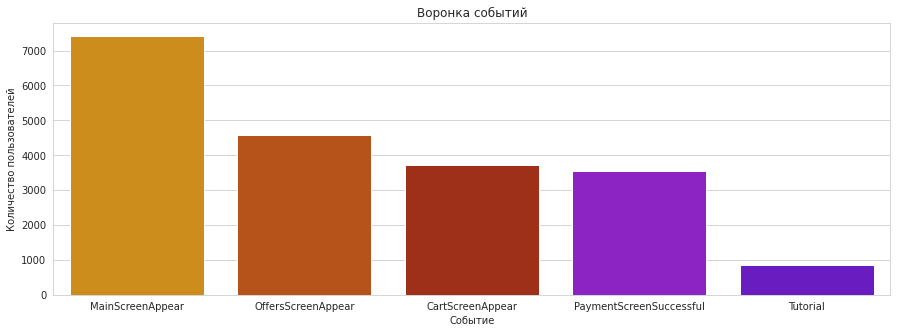

In [154]:
sns.set_style("whitegrid") #построим график воронки событий
plt.figure(figsize=(15,5))
sns.barplot(y='total_users', x='event', data=funnel, palette='gnuplot_r')
plt.title('Воронка событий')
plt.xlabel('Событие')
plt.ylabel('Количество пользователей')
plt.show()

Посмотрим в каком порядке происходят события. События выстраиваются в последовательную цепочку: 
- "Появление главного экрана";
- "Появление экрана предложений";
- "Появление экрана корзины";
- "Экран успешного платежа";
- "Руководство".  
Единственное, что событие связанное с руководством (обучением) выпадает из общей цепочки.

In [155]:
funnel = funnel.query('event != "Tutorial"') #исключим событие связанное с обучением

In [156]:
fig = go.Figure()  #построим график воронки по шагам
fig = go.Figure(go.Funnel(
    y = funnel['event'],
    x = funnel['total_users'],
    textinfo = "value+percent initial+percent previous"))
fig.update_layout(title='График воронки по шагам') 

Из 7419 пользователей в наших данных до следующего шага доходят 4593 пользователя, что составляет 62% от общего числа. До следующего шага доходят 3754 пользователя, что составляет от первого шага 50% и 81% от второго шага. До последнего шага доходят 3539, что составляет 48% от первого шага и 95% от третьего шага. Показатели хорошие, учитывая, что на втором шаге у нас отваливаются 38% пользователей. Получается, что на втором шаге теряется больше всего пользователей - 38%.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️** 
   
   Очень хорошо - проблема обнаружена - провал на первом шаге: от `MainScreenAppear` к `OffersScreenAppear`. Вероятно, нужно лучше прорабатывать механику, чтобы пользователи переходили к `OffersScreen`.
    
`Tutorial`, действительно, можно просто пропустить.
</div>


<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Не забывай добавлять графикам заголовки

</div>




<div class="alert alert-block alert-info">
  
<b>Комментарий cтудента</b>
 
Добавил заголовок.

### Изучим результаты эксперимента

In [157]:
logs_new = logs_new.query('event != "Tutorial"') #посмотрим сколько пользователей в каждой группе
users_group = logs_new.groupby('group')['user_id'].nunique()
users_group['AA1'] = users_group['A'] + users_group['A1']
users_group

group
A      2483
A1     2512
B      2535
AA1    4995
Name: user_id, dtype: int64

In [158]:
len(logs_new.groupby('user_id')['group'].nunique().reset_index().query('group > 1')) #посмотрим пересекаются ли пользователи между друг другом в группах

0

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Также стоит проверить, чтобы пользователи не пересекались между собой в группах

</div>


Проверим сколько пользователей в каждой из экспериментальной групп. Также посмотрим, пересекаются ли пользователи между собой в группах. Данные выглядят сопостовимо с друг другом, пользователи не пересекаются. 

<div class="alert alert-block alert-info">
  
<b>Комментарий cтудента</b>
 
Зачемание учтел, добавил код, который проверит есть ли пользователи, которые пересекаются между собой в группах.

In [159]:
users_A = (logs_new[logs_new['group'] == 'A']['user_id']).nunique() #посмотрим статистические критерии разниц между выборками A и A1
users_A1 = (logs_new[logs_new['group'] == 'A1']['user_id']).nunique()
users_B = (logs_new[logs_new['group'] == 'B']['user_id']).nunique()
print('Количество пользователей в группах A-A1 различается на', round(100 - (users_A / users_A1 * 100), 2), '%')
print('Количество пользователей в группах A-B различается на', round(100 - (users_A / users_B * 100), 2), '%')
print('Количество пользователей в группах A1-B различается на', round(100 - (users_A1 / users_B * 100), 2), '%')

Количество пользователей в группах A-A1 различается на 1.15 %
Количество пользователей в группах A-B различается на 2.05 %
Количество пользователей в группах A1-B различается на 0.91 %


Посмотрим разницу между выборками 246(A) и 247(A1). Группы отличаются по количеству более, чем на 1%. Далее мы посмотрим на сколько эти различия статистически значимы.

In [160]:
df_test = logs_new.pivot_table( #создадим отдельную таблицу с нашими группами и выберем самое популярное событие
    index='event', 
    columns='group', 
    values='user_id',
    aggfunc='nunique').sort_values(by='A', ascending=False).reset_index()

df_test['AA1'] = df_test['A1'] + df_test['A']

df_test['share_A'] = (df_test['A'] / users_group['A'] * 100).round(1)
df_test['share_A1'] = (df_test['A1'] / users_group['A1'] * 100).round(1)
df_test['share_B'] = (df_test['B'] / users_group['B'] * 100).round(1)
df_test['share_AA1'] = ((df_test['A'] + df_test['A1']) / (users_group['A'] + users_group['A1']) * 100).round(1)

df_test

group,event,A,A1,B,AA1,share_A,share_A1,share_B,share_AA1
0,MainScreenAppear,2450,2476,2493,4926,98.70,98.60,98.30,98.60
1,OffersScreenAppear,1542,1520,1531,3062,62.10,60.50,60.40,61.30
2,CartScreenAppear,1266,1238,1230,2504,51.00,49.30,48.50,50.10
3,PaymentScreenSuccessful,1200,1158,1181,2358,48.30,46.10,46.60,47.20


In [161]:
fig = go.Figure() #создадим график событий между группами
fig.add_trace(go.Funnel(
    name = 'A',
    y = df_test['event'],
    x = df_test['A'],
    textinfo = "value+percent initial+percent previous"))

fig.add_trace(go.Funnel(
    name = 'A1',
    y = df_test['event'],
    x = df_test['A1'],
    textinfo = "value+percent initial+percent previous"))

fig.add_trace(go.Funnel(
    name = 'B',
    y = df_test['event'],
    x = df_test['B'],
    textinfo = "value+percent initial+percent previous"))
fig.update_layout(title='График событий между группами') 

Посмотрим какое самое популярное событие и посчитаем долю пользователей совершивших это событие в каждой из контрольных групп. Самым популярным событием является "Появление главного экрана". Разбиение на группы работает корректно.

In [162]:
def my_ztest(a1, a2, b1, b2):
    # Обоснование коэффициента будет ниже, в соответствующем разделе
    alpha = 0.01

    # исходные данные
    first_step = np.array([a1, b1])
    next_step = np.array([a2, b2])

    # пропорция успехов в первой группе:
    p1 = next_step[0]/first_step[0]

    # пропорция успехов во второй группе:
    p2 = next_step[1]/first_step[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (next_step[0] + next_step[1]) / (first_step[0] + first_step[1])

    # разница пропорций в датасетах
    difference = p1 - p2

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/first_step[0] + 1/first_step[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)
if (p_value < alpha):
        print("Отвергаем нулевую гипотезу, есть статистически значимая разница")
else:
        print("Не получилось отвергнуть нулевую гипотезу, нет статистически значимой разницы")

p-значение:  0.12044299485641763
Не получилось отвергнуть нулевую гипотезу, нет статистически значимой разницы


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Не рекомендую прописывать числа 1200, 1158 вручную - легко допустить ошибку. Эти числа можно получить с помощью данных 

</div>


<div class="alert alert-block alert-info">
  
<b>Комментарий cтудента</b>
 
Зачемание учтел, исправил код.

Посмотрим, есть ли статистические критерии разниц между выборками А и А1
Зададим следующие гипотезы:
- H0: Статистически значимой разницы между конверсиями пользователей в оплату заказа между выборками нет;
- H1: Статистически значимая разница между конверсиями пользователей в оплату заказа между группами есть.



z-тест показывает, что статистически значимой разницы между конверсиями пользователей в оплату заказа между выборками А и А1 нет.

In [163]:
def z_test(group1, group2, alpha): 
    p1_event = df_test.loc[event_name, group1]
    p2_event = df_test.loc[event_name, group2] 
    p1_users = users_group.loc[group1] 
    p2_users = users_group.loc[group2] 
    
    # пропорция успехов в первой группе:
    p1 = p1_event / p1_users 
    # пропорция успехов во второй группе
    p2 = p2_event / p2_users 
    
    # пропорция успехов в комбинированном датасете
    p_combined = (p1_event + p2_event) / (p1_users + p2_users) 
    
    # разница пропорций в датасетах
    difference = p1 - p2
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_users + 1 / p2_users))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    # введем поправку Бонферрони, поделим альфа на число гипотез для всех проверок
    bonferroni_alpha = alpha / 17
    
    print('Проверка для групп {} и {}, событие: {}, p-значение: {p_value:.2f}'.format(group1, group2, event_name, p_value=p_value))
    if (p_value < bonferroni_alpha):
        print("Отвергаем нулевую гипотезу о равенстве данных в группах")
    else:
        print("Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах")

In [164]:
for event_name in df_test.index: #сравним группы A и A1
    z_test('A', 'A1', 0.01)
    print()

Проверка для групп A и A1, событие: 0, p-значение: 0.75
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A и A1, событие: 1, p-значение: 0.25
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A и A1, событие: 2, p-значение: 0.23
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A и A1, событие: 3, p-значение: 0.11
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах



Посмотрим отличаются группы статистически для всех событий. Проверку зададим в отдельную функцию. Разбиение на группы работает корректно. Статистически значимой разницы для всех событий воронки продаж в группах нет.

In [165]:
# Сравним группу В с тестовой группой А
for event_name in df_test.index:
    z_test('B', 'A', 0.01)
    print()

Проверка для групп B и A, событие: 0, p-значение: 0.34
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп B и A, событие: 1, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп B и A, событие: 2, p-значение: 0.08
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп B и A, событие: 3, p-значение: 0.22
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах



Сравним результаты контрольной группы B с А. Статистически значимой разницы для всех событий воронки продаж в группах B и A нет.

In [166]:
# Сравним группу В с тестовой группой А1
for event_name in df_test.index:
    z_test('B', 'A1', 0.01)
    print()

Проверка для групп B и A1, событие: 0, p-значение: 0.52
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп B и A1, событие: 1, p-значение: 0.93
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп B и A1, событие: 2, p-значение: 0.59
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп B и A1, событие: 3, p-значение: 0.73
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах



Сравним результаты контрольной группы B с А1. Статистически значимой разницы для всех событий воронки продаж в группах B и A1 нет.

In [167]:
# Сравним группу В с объединённой контрольной группой А+А1
for event_name in df_test.index:
    z_test('AA1', 'B', 0.01)
    print()

Проверка для групп AA1 и B, событие: 0, p-значение: 0.35
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп AA1 и B, событие: 1, p-значение: 0.45
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп AA1 и B, событие: 2, p-значение: 0.19
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп AA1 и B, событие: 3, p-значение: 0.61
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах



Сравним результаты контрольной группы B с АА1. Статистически значимой разницы для всех событий воронки продаж в группах B и A нет.

In [168]:
result = 1-(1-0.01/16)**16
print('Вероятность появления ошибки: {:.2%}'.format(result))  #проверим вероятность появление ошибки методом Бонферрони

Вероятность появления ошибки: 1.00%


Для корректировки уровня значимости стоит выбрать метод Бонферрони. Всего было сделано 16 проверок статистических гипотез, уровень значимости применялся 0.01 Для правильного применения этого метода нужно во всех экспериментах разделить заданный уровень alpha на 16. С таким коэффициентом вероятность встретить ошибку гораздо меньше. Таким образом, вероятность появления ошибки составляет 1%, значит результатам нашего анализа можно доверять.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Самая первую проверка - Появление главного экрана 246/247 - дублируется после, поэтому суммарно получается 16 проверок

</div>


<div class="alert alert-block alert-info">
  
<b>Комментарий cтудента</b>
 
Зачемание учтел, изменил код. Запутался в проверках.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   


   
   Очень хорошо, что используешь поправку Бонферрони и знаком с поправками на множественную проверку гипотез. Однако отмечу, что данная поправка используется редко. Причины: эта поправка слишком сильно уменьшает уровень альфа, опровергнуть нулевую гипотезу становится фактически невозможно; повышается вероятность совершить ошибку второго рода. Возможное решение - использовать менее мощные поправки - рекомендую ознакомиться со статьей: https://studfile.net/preview/10706903/page:19/
Также рекомендую статью: https://habr.com/ru/company/yandex/blog/476826/ - в ней описывается применение библиотеки `statsmodels` - пригодится в дальнейшем                    

</div>




### Выводы

В ходе работы было проведено исследование поведения пользователей в нашем мобильном приложении. Перед началом исследование необходимо было обработать входные данные. В ходе работы данные были проверенны на пропущенные значения, удалены дубликаты, заменены типы данных для простоты исследования. После всех исправлений была проведена исследовательская работа по изучению воронки событий и результатов эксперимента. 

Результаты эксперимента показали:

- z-тест показал, что статистически значимой разницы между конверсиями пользователей в оплату заказа между выборками А и А1 нет (p-значение:  0.12044299485641763) - группы одинаковые;
- Разбиение на группы работает корректно. Статистически значимой разницы для всех событий воронки продаж в группах нет (A и A1 - событие: 0, p-значение: 0.75, A и A1 - событие: 1, p-значение: 0.25, A и A1 - событие: 2, p-значение: 0.23, A и A1 - событие: 3, p-значение: 0.11);
- Что касается шрифтов, статистически значимой разницы для всех событий воронки продаж в группах B и A нет (B и A - событие: 0, p-значение: 0.34, B и A - событие: 1, p-значение: 0.21, B и A - событие: 2, p-значение: 0.08, B и A - событие: 3, p-значение: 0.22);
- Статистически значимой разницы для всех событий воронки продаж в группах B и A1 также нет (B и A1 - событие: 0, p-значение: 0.52, B и A1 - событие: 1, p-значение: 0.93, B и A1 - событие: 2, p-значение: 0.59, B и A1 - событие: 3, p-значение: 0.73);
- Сравним результаты контрольной группы B с А1. Статистически значимой разницы для всех событий воронки продаж в группах B и A1 нет.
- Сравним результаты контрольной группы B с АА1. Статистическая значимость разницы для всех событий воронки продаж в группах B и A также отсутствует (Проверка для групп AA1 и B - событие: 0, p-значение: 0.35, AA1 и B - событие: 1, p-значение: 0.45, AA1 и B - событие: 2, p-значение: 0.19, AA1 и B - событие: 3, p-значение: 0.61). 

Также для корректировки уровня значимости был выбран метод Бонферрони, сделано 16 проверок статистических гипотез, уровень значимости применялся 0.01. Вероятность появления ошибки составило 1%, значит результатам нашего анализа можно доверять. Таким образом, можно сделать вывод, что шрифты никак не повлияют на наших пользователей, и точно не отпугнут их от совершения покупки.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Эдгар, проведен основательный и подробный анализ. Все наглядно - графики и гистограммы подтверждают обоснованные выводы. Учти мои замечания. Возможно, придется немного подправить выводы. Жду твой проект на повторное ревью. Успехов!

</div>


<div class="alert alert-block alert-info">
  
<b>Комментарий cтудента</b>
 
Спасибо за комментария! замечания исправил! 

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Эдгар, замечания устранены 👍. Уверен, мои советы пригодятся тебе в новых проектах. Успехов в обучении! 😉 

</div>